# Machine Learning: Major Project

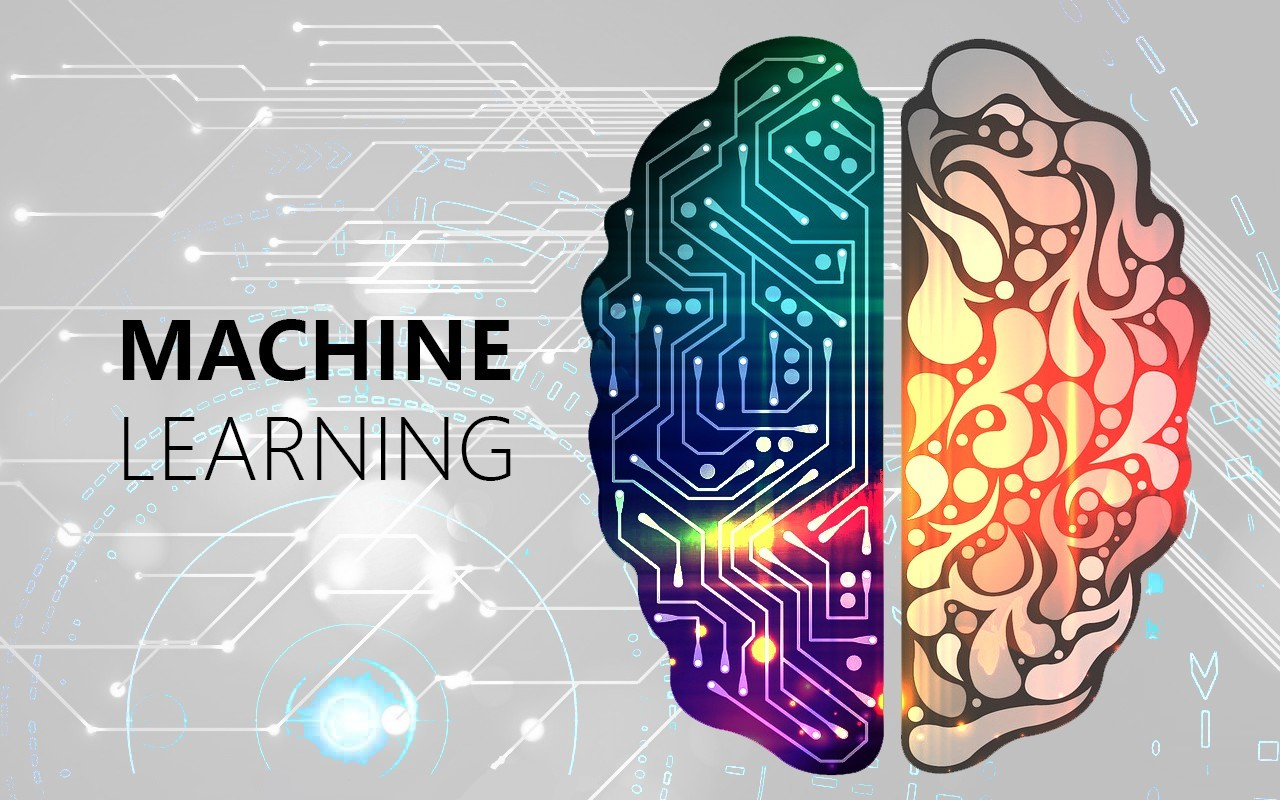

# Index

1. The DATA 
2. Data Cleaning 
3. EDA
4. Data Preparation
5. Training Several Models.
6. Fine-Tuning the Best Model.
7. Getting the Final Price Predictions.

## Importing all the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# 1. The DATA

In [2]:
cars = pd.read_excel("Data_Train.xlsx")

### Taking a quick look at the data.

In [3]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [4]:
cars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

The given target attribute is "Price" of the cars. All the further analysis is done according to that.

In [5]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


If we see the "Kilometers_Driven" attribute, we can notice that the "max" value is too further spaced with the 3rd quartile than the 3rd quartile is with the median or the 1st quartile, this most likely suggests the possibility of outliers in the "Kilometers_Driven" attribute. We will see it shortly below in the "EDA" part of this analysis.

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


As we can see here, a few attributes have missing data. Next, we can notice here is that the Mileage, Engine and Power attributes are "object" type attributes. That's because they each have a unit of measurement associated with them. We will remove those units and convert those attributes to "int" type for further anatysis, as these attributes can directly affect our target attribute(Price).

### The data needs to be cleaned in order for us to do any further analysis. So the before proceding any further let's clean the data.

# 2. Data Cleaning

In this analysis, the entire process of Data Cleaning is classified in two steps:
1. Removing the measurment units of the Mileage, Engine and Power attributes.
2. Filling the null values with Mean, Median or Mode Imputation.

#### 1. Removing the measurment units of the Mileage, Engine and Power attributes.
The function "units_remover" defined below will remove the units, hence converting the attributes from "object" to numeric data-type.

The function will also be helpfull further in the analysis in the transformation pipeline for the transformation of test data set.

In [7]:
def units_remover(cars):
    lst_power = cars["Power"]

    app_power = []
    for ele in lst_power:
        app_power.append(str(ele).split())
    to_power = []
    for ele in app_power:
        try:
            to_power.append(float(ele[0]))
        except:
            to_power.append(np.nan)

    cars["Power"] = to_power


    lst_engine = cars["Engine"]

    app_engine = []
    for ele in lst_engine:
        app_engine.append(str(ele).split())
    to_engine = []
    for ele in app_engine:
        try:
            to_engine.append(int(ele[0]))
        except:
            to_engine.append(np.nan)

    cars["Engine"] = to_engine

    lst_mileage = cars["Mileage"]

    app_mileage = []
    for ele in lst_mileage:
        app_mileage.append(str(ele).split())
    to_mileage = []
    for ele in app_mileage:
        try:
            to_mileage.append(float(ele[0]))
        except:
            to_mileage.append(np.nan)

    cars["Mileage"] = to_mileage
    return cars
cars = units_remover(cars)

#### 2. Filling the null values with Mean, Median or Mode Imputation.
The function "null_filler" will fill the null values and make the data clean for any further analysis.

Same as before we will be using this same function for the transformation of test data set as well.

In [8]:
def null_filler(cars):
    cars_num = cars.drop(["Name","Location","Fuel_Type","Transmission","Owner_Type"],axis = 1)

    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")
    imputer.fit(cars_num)

    clean_num = imputer.transform(cars_num)

    cars_num = pd.DataFrame(clean_num,columns=cars_num.columns,
                       index=cars_num.index)

    cars["Power"] = cars_num["Power"]
    cars["Engine"] = cars_num["Engine"]
    cars["Mileage"] = cars_num["Mileage"]
    cars["Kilometers_Driven"] = cars_num["Kilometers_Driven"]
    cars["Seats"] = cars_num["Seats"]

    count = 0
    lst_mile = []
    for ele in cars.itertuples():
        lst_mile.append(float(ele.Mileage))
    for num, ele in enumerate(lst_mile):
        if ele == 0.0:
            lst_mile[num] = 18.15
    cars["Mileage"] = lst_mile
    for ele in cars["Mileage"]:
        if ele == 0:
            print(ele)
    return cars
cars = null_filler(cars)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 564.4+ KB


#### Now that there are no null values in the data, it is ready for further analysis.

# 3. EDA

Exploratory Data Analysis or Data Exploration is one of the most important part of the data analysis since we get usefull insights from the data by performing EDA.

Let's start the EDA by exploring every attribute individually, and visualising it. We will also add some new custom attributes in order to better understand the data.

### 1. Location

In [10]:
cars.Location.unique().tolist()

['Mumbai',
 'Pune',
 'Chennai',
 'Coimbatore',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Ahmedabad']

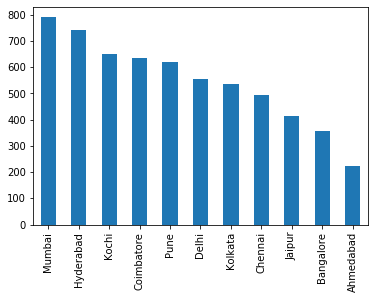

In [11]:
cars.Location.value_counts().plot(kind="bar")

Most number of cars are being sold in Mumbai and least in Ahmedabad. This could shed some light on the lifestyle of people living these corresponding cities but it will not affect the "Price" attribute heavily.

### 2. Year

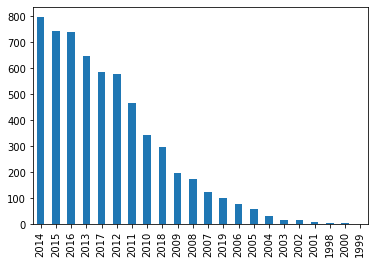

In [12]:
cars.Year.value_counts().plot(kind="bar")

This graph gives us mainly two insights. The first is that, since more cars are being bought since 2011, it suggests that the overall lifestyle of the people in India has improved. The second inference that we can draw is that people prefer more recent cars than the cars from the past decades.

### 3. Kilometers_Driven

We noticed in the "cars.describe()" method that there might be some outliers in the "Kilometers_Driven" attribute. We can check this by visualising the attribute.

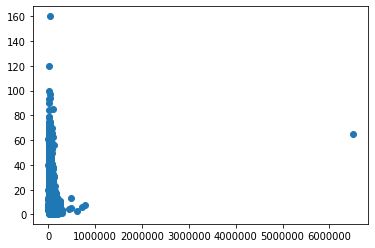

In [13]:
plt.plot(cars["Kilometers_Driven"],cars['Price'],'o')
plt.show()

There are clearly outliers in the given data. Let's apply median imputation on these outliers

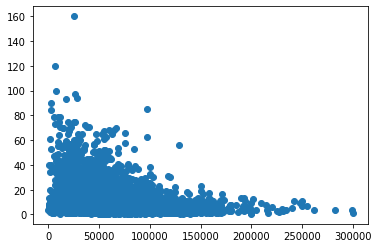

In [14]:
lst_kd = []
for ele in cars["Kilometers_Driven"]:
    lst_kd.append(ele)

for num, ele in enumerate(lst_kd):
    if ele > 400000:
        lst_kd[num] = np.median(cars["Kilometers_Driven"])
for ele in lst_kd:
    if ele>400000:
        print(ele)
        
cars["Kilometers_Driven"] = lst_kd

plt.plot(cars["Kilometers_Driven"],cars['Price'],'o')
plt.show()

### 4. Fuel_Type

In [15]:
cars.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

If more number of Diesel fueled cars are being sold, then more people are instrested in buying them. This will definately affect the automobile industry since the production of Diesel fueled cars will increase. As the number of these cars will be sold, the price of Diesel fueled cars will decrease. Hence this is a very usefull insight.

### 5. Transmission

In [16]:
cars.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

Same as before the prices of "Manual" cars will be comparitively lesser than that of the "Automatic" cars.

### 6. Owner_Type

In [17]:
cars.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

The "First" category means that the car has been used by only one user before and so the person buying the car now will be using a "second hand car". People mostly prefer a "second hand" car other than a car which has already been used by 2 or more users. So it is understandable that the owner_type data has more number of "First" category than any other categories. 

### 7. Engine, Mileage and Power

To see if the attributes "Engine, Mileage and Power" have any effect on the target attribute(Price) let us use the scatter matrix which can show us the corelation of all the attributes at the same time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F6E4E5188>,
      dtype=object)

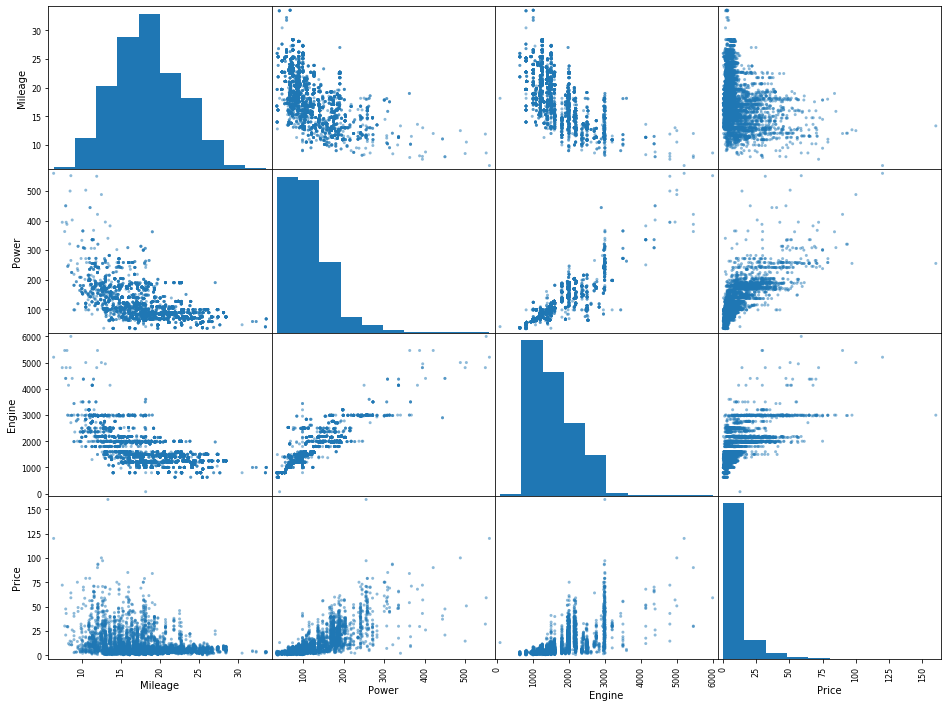

In [18]:
from pandas.plotting import scatter_matrix

attribs = ["Mileage","Power","Engine","Price"]
scatter_matrix(cars[attribs],figsize=(16,12))

As we can see here, the only attributes that are somewhat affecting the Price of cars are the Engine and Power attributes. Since those attributes have already been cleaned during the Data Cleaning process, they are ready for the training purpose.

### 8. Uses of the Name attribute.

As we saw earlier the "Name" attribute contains the full names of the cars, which includes the name of the manufacturing company, the model name and the name of specific subcategory. Here we will extract the name of the manufacturing company and the model name in order to get better insights from the data.

The function "new_attributes_adder" will add three attributes to the current data.
1. The "Company_Name" will contain the name of manufacturing company
2. The "Model_Name" will contain the model name
3. The "Company_and_Model" will contain the company and model name

In [19]:
def new_attributes_adder(cars):
    names = cars["Name"]
    parts_of_whole = []
    for name in names:
        parts_of_whole.append(name.split())
    company = []
    model = []
    company_nd_model = []
    for ele in parts_of_whole:
        company.append(ele[0].lower())
        model.append(ele[1].lower())
        company_nd_model.append(ele[0]+" "+ele[1])
    cars["Company_Name"] = company
    cars["Model_Name"] = model
    cars["Company_and_Model"] = company_nd_model
    return cars

In this case I have called the function right here to add these attributes to the data in order to be able to perform the EDA more thoroughly using "Company_Name" attribute. The same function will also be called later in the pipeline for the transformation of the test set.

In [20]:
cars = new_attributes_adder(cars)

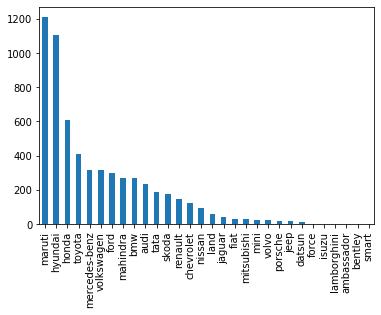

In [21]:
cars.Company_Name.value_counts().plot(kind="bar")

Most of the cars being bought are Maruti, Hyundai and Honda. Since many number of those cars are being sold, the price of these cars will be much less than the other cars. This will be another key factor that will affect the "Price" attribute.

We will split the data stratifically according to the "Comapny_Name" attribute because it will be one of the key deciding factors in calculating the target value(Price).

# 4. Data Preparation

Now that the data is clean and we have extracted some insights from the data, the data is ready to be prepared for machine learning algorithms.

The process of Data Preparation is split in the following steps:
1. Encoding the text attributes.
2. Spliting the data stratifically.
3. Converting to numeric data
4. Splitting the input objects and labels
5. Splitting the test set

### 1. Encoding the text attributes

In this section of Data Preparation, the text attributes of the data have been encoded by using the OneHotEncoder. This encoding is done because most of the machine learning algorithms are only capable of dealing with numeric data.

In [22]:
def attributes_encoder(cars):
    temp_num = cars.index.stop
    cars_fuel = np.array(cars["Fuel_Type"]).reshape(temp_num,1)
    cars_trans = np.array(cars["Transmission"]).reshape(temp_num,1)
    cars_owner = np.array(cars["Owner_Type"]).reshape(temp_num,1)
    cars_Company_Name = np.array(cars["Company_Name"]).reshape(temp_num,1)

    from sklearn.preprocessing import OneHotEncoder
    ohencoder = OneHotEncoder()

    fuel_coded = ohencoder.fit_transform(cars_fuel)
    trans_coded = ohencoder.fit_transform(cars_trans)
    owner_coded = ohencoder.fit_transform(cars_owner)
    Company_Name_coded = ohencoder.fit_transform(cars_Company_Name)

    fuel_coded = pd.DataFrame(fuel_coded.toarray())
    trans_coded = pd.DataFrame(trans_coded.toarray())
    owner_coded = pd.DataFrame(owner_coded.toarray())
    Company_Name_coded = pd.DataFrame(Company_Name_coded.toarray())

    fuel_cols = list(cars["Fuel_Type"].unique())
    fuel_cols.sort()
    trans_cols = list(cars["Transmission"].unique())
    trans_cols.sort()
    owner_cols = list(cars["Owner_Type"].unique())
    trans_cols.sort()
    Company_Name_cols = list(cars["Company_Name"].unique())
    Company_Name_cols.sort()

    cars[fuel_cols] = fuel_coded
    cars[trans_cols] = trans_coded
    cars[owner_cols] = owner_coded
    cars[Company_Name_cols] = Company_Name_coded
    return cars
cars = attributes_encoder(cars)

### 2. Splitting the data stratifically.

The function "data_splitter()" defined below will split the data which is given to it using the "StratifiedShuffleSplit" model in SciKitLearn. 

In [23]:
def data_splitter(cars):
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(cars,cars["Company_Name"]):
        cars_train = cars.iloc[train_index]
        cars_test = cars.iloc[test_index]
    return cars, cars_train, cars_test

Before we go ahead and call this function by giving it the parameter as the data, we need to remember something about the "StratifiedShuffleSplit". In order to split the data, every member of the "Company_Name" must have atleast 2 instances. For example: "lamborghini", "smart", "bentley" and "ambassador" each have only one instance.

In [24]:
cars.Company_Name.value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
force               3
isuzu               3
lamborghini         1
ambassador          1
bentley             1
smart               1
Name: Company_Name, dtype: int64

As a solution to this problem we need to manually remove those instances from the data. Then split the remaining data stratifically. And then add those removed instances to the train_data.

The "instance_remover" function defined below will remove those instances and store them in another DataFrame called "cars_highend" since all those cars are Highend cars.

In [25]:
def instance_remover(cars):
    cars_highend = pd.DataFrame(columns = cars.columns)
    for ele in cars.itertuples():
        if ele.Company_Name == "lamborghini" or ele.Company_Name == "smart" or ele.Company_Name == "ambassador" or ele.Company_Name=="bentley":
            ele = pd.DataFrame(ele).T
            ele.index = ele[0]
            ele = ele.drop([0],axis=1)
            ele.columns = cars.columns
            cars_highend = cars_highend.append([ele],ignore_index=False)
    highend_index = list(cars_highend.index)
    cars = cars.drop(highend_index,axis=0)
    return cars, cars_highend

The "instance_appender" function will append the instances to the training data created by "StratifiedShuffleSplit"

In [26]:
def instance_appender(cars_train):
    cars_train_new = cars_train.append(cars_highend,ignore_index=False)
    return cars_train_new

First the "instance_remover" function must be called. Then the "data_splitter" function must be called and finally the "instance_appender" function must be called.

In [27]:
cars, cars_highend = instance_remover(cars)
cars, cars_train, cars_test = data_splitter(cars)
cars_train = instance_appender(cars_train)

Now that we have our training data ready, there are a few more steps that need to be done before training machine learning algorithms

### 3. Converting to numeric data.

Most of the machine learning algoritms only work with numeric type of data. Hence the train data needs to be converted to "numeric" type. This can be accomplished by dropping all the text attributes. As we have already encoded the text attribute, we can drop them now. The function "num_converter" will drop the text attributes.

In [28]:
def num_converter(data):
    data_num = data.drop(["Name","Location","Fuel_Type","Transmission",
                                            "Owner_Type","Company_Name","Model_Name","Company_and_Model"],axis=1)
    data = data_num
    return data

In [29]:
cars_train = num_converter(cars_train)
cars_test = num_converter(cars_test)

### 4. Splitting the input objects and labels.

This is a supervised learning process. Hence the algorithm needs to be trained with input and output data. 
The "train_xy_splitter" function will split the data in two parts - input objects and labels.

In [30]:
def train_xy_splitter(cars_train):
    cars_train_y = cars_train["Price"].copy()
    cars_train_x = cars_train.drop("Price",axis=1)
    return cars_train_y, cars_train_x

In [31]:
cars_train_y, cars_train_x = train_xy_splitter(cars_train)

Now the data is completely prepared to be trained on a machine learning algorithm.

### 5. Splitting the test set.

The test set also needs to be split in object and labels. The "test_xy_splittter" function will split the test set.

In [32]:
def test_xy_splitter(cars_test):
    cars_test_y = cars_test["Price"].copy()
    cars_test_x = cars_test.drop("Price",axis=1)
    return cars_test_y, cars_test_x

In [33]:
cars_test_y, cars_test_x = test_xy_splitter(cars_test)

# 5. Training Several Models.

In this section of data analysis we will train several models and pick the best one out of them.

We will be training the following models :
1. Linear Regression.
2. Ridge regression.
3. Lasso Regression.
4. Decision Tree Regression.
5. Random Forest Regression.

### 1. Linear Regression.

#### Training the model

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(cars_train_x, cars_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we have a working Linear Regression model. To evaluate the model we will predict the "Price" from the test set and calculate the RMSE value and the r-squared value in order to evaluate the model.

#### Error Calculation on Predictions.

In [35]:
lr_test_predict = lin_reg.predict(cars_test_x)
from sklearn.metrics import r2_score
print("R2_score: ",r2_score(cars_test_y,lr_test_predict))
from sklearn.metrics import mean_squared_error
linreg_mse = mean_squared_error(cars_test_y,lr_test_predict)
linreg_rmse = np.sqrt(linreg_mse)
print("RMSE score: ",linreg_rmse)

R2_score:  0.7306413182129088
RMSE score:  6.1396594222455905


The R2_score is approx. 0.73 and RMSE score is approx. 6.13, which are not very good scores. There are two solutions to increase the precision of the prediction. The first solution is to get more data. But that is not possible for us as the given data is limited. The second solution is to pick a more powerful model. So let us try the same problem by using the Decision Tree regression.

### 2. Ridge Regression.

In [36]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(cars_train_x, cars_train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
rid_predict = rid.predict(cars_test_x)
print("R2_score: ",r2_score(cars_test_y,rid_predict))
rid_mse = mean_squared_error(cars_test_y,rid_predict)
rid_rmse = np.sqrt(rid_mse)
print("RMSE: ",rid_rmse)

R2_score:  0.7304483239836927
RMSE:  6.141858546956912


### 3. Lasso Regression.

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(cars_train_x, cars_train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
lasso_predict = lasso.predict(cars_test_x)
print("R2_score: ",r2_score(cars_test_y,lasso_predict))
lasso_mse = mean_squared_error(cars_test_y,lasso_predict)
lasso_rmse = np.sqrt(lasso_mse)
print("RMSE: ",lasso_rmse)

R2_score:  0.6359350524604864
RMSE:  7.137863279280417


### 4. Decision Tree Regression.

#### Training the model.

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_train_x, cars_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Error calculations on the Predictions.

In [41]:
tree_predict = tree_reg.predict(cars_test_x)
print("R2_score: ",r2_score(cars_test_y,tree_predict))
treereg_mse = mean_squared_error(cars_test_y,tree_predict)
treereg_rmse = np.sqrt(treereg_mse)
print("RMSE score: ",treereg_rmse)

R2_score:  0.7709786761858984
RMSE score:  5.661307596225948


We can see here that the the R2_score has improved from the previous 0.73 to 0.77, also the RMSE score has improved from 6.13 to 5.66. But these scores are still not acceptable. 

### 5. Random Forest Regressor

#### Training the model.

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(cars_train_x,cars_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Error Calculation on Predictions.

In [43]:
forest_predict = forest_reg.predict(cars_test_x)
print("R2_score: ",r2_score(cars_test_y,forest_predict))
forest_mse = mean_squared_error(cars_test_y,forest_predict)
forest_rmse = np.sqrt(forest_mse)
print("RMSE: ",forest_rmse)

R2_score:  0.8564199231833326
RMSE:  4.4825576364784006


As we can see the Random Forest Regressor is clearly the  best model out of all three models. The RMSE score is 4.482 and the R2_score is 0.8564 which means that the model is 85.64% precise. We can still improve the precision of the model by fine-tuning the model.

# 6. Fine-Tuning the Best Model.

The best model out of the five models that were trained is the "RandomForestRegression". So let us now try to increase the accuracy of it's predictions.

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [30,35,40], 'max_features': [10,11,12]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                scoring='neg_mean_squared_error',
                return_train_score=True)
grid_search.fit(cars_train_x, cars_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
final_model = grid_search.best_estimator_

In [46]:
final_predict = final_model.predict(cars_test_x)
print("Final R2_score: ",r2_score(cars_test_y,final_predict))
final_mse = mean_squared_error(cars_test_y,final_predict)
final_rmse = np.sqrt(final_mse)
print("Final RMSE: ",final_rmse)

Final R2_score:  0.8706412917318747
Final RMSE:  4.254775274920464


As we can see the r2_score and RMSE have improved and now we can get the original Test_Data and get the Price values.

# 7. Getting the Final Price Predictions.

In [47]:
test_data = pd.read_excel("Data_Test.xlsx")

Now we will call the functions defined earlier in order to clean the test set and prepare it for the machine learning algorithm.

In [48]:
test_data = units_remover(test_data)
test_data = null_filler(test_data)
test_data = new_attributes_adder(test_data)

In [49]:
temp_num = test_data.index.stop

In [50]:
test_data = attributes_encoder(test_data)
test_data = num_converter(test_data)

Now the test_data is ready for the final_model which we created for predicting the prices.

But before that, we must check if the columns of "cars_train_x" and "test_data" are same; Or else the model will fail with a Traceback(ValueError)

In [51]:
print("Columns in test_data:   ",len(test_data.columns))
print("Columns in cars_train_x:",len(cars_train_x.columns))

Columns in test_data:    44
Columns in cars_train_x: 47


This can be fixed by appending columns of zero values to the corresponding DataFrames. The "error_handler" function will fix this problem.

In [52]:
def error_handler(cars_train_x, test_data):
    to_train = []
    for ele in test_data.columns:
        if ele not in cars_train_x.columns:
            to_train.append(ele)
    to_test = []
    for ele in cars_train_x.columns:
        if ele not in test_data.columns:
            to_test.append(ele)
    to_train2 = pd.DataFrame(np.zeros((len(cars_train_x.index),2)))
    to_train2.columns = to_train
    to_train2.index = cars_train_x.index
    cars_train_x[to_train2.columns] = to_train2
    to_test2 = pd.DataFrame(np.zeros((len(test_data.index),5)))
    to_test2.columns = to_test
    to_test2.index = test_data.index
    test_data[to_test2.columns] = to_test2
    return cars_train_x, test_data

In [53]:
cars_train_x, test_data = error_handler(cars_train_x, test_data)

Now we will again train the "final_model" with the new training set which is "cars_train_x"

In [54]:
final_model.fit(cars_train_x,cars_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=35, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

We will now get the final predictions of the test data from the final_model.

In [55]:
final_predictions = final_model.predict(test_data)

Now the final predictions will be stored in a DataFrame and this DataFrame will be appended to the DataFrame of "Data_Test.xlsx" which has been provided by the mentors.

In [56]:
final_predictions = pd.DataFrame(final_predictions)

In [57]:
Final_Sheet = pd.read_excel("Data_Test.xlsx")
Final_Sheet["Final_Predictions"] = final_predictions

Below is the Final Excel Sheet of the provided data with the added column of final_predictions. This excel sheet has been uploaded along with this notebook(.ipynb).

In [58]:
Final_Sheet.to_excel("Final_Sheet.xlsx")

# Thank You